In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
GOOGL = pd.read_csv('GOOGL.csv')
AMZN = pd.read_csv('AMZN.csv')
AAPL = pd.read_csv('AAPL.csv')
META = pd.read_csv('META.csv')
MSFT = pd.read_csv('MSFT.csv')

it_df = [GOOGL, AMZN, AAPL, META, MSFT]
for it in it_df:
    print(it.shape)

(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)


### Model 1. Linear Regression

In this model, we would use the prices of other 4 stocks to predict the price

In [3]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a Linear Regression object
linreg = LinearRegression()

In [4]:
# Using Only the other 4 Tech Stocks
X = pd.concat([AMZN["4. close"], AAPL["4. close"], 
               META["4. close"], MSFT["4. close"]], axis=1)
y = GOOGL["4. close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  404.56241831640045
Coefficients 	: a =  [ 0.06016921  1.04542288 -0.48002713  6.87356016]


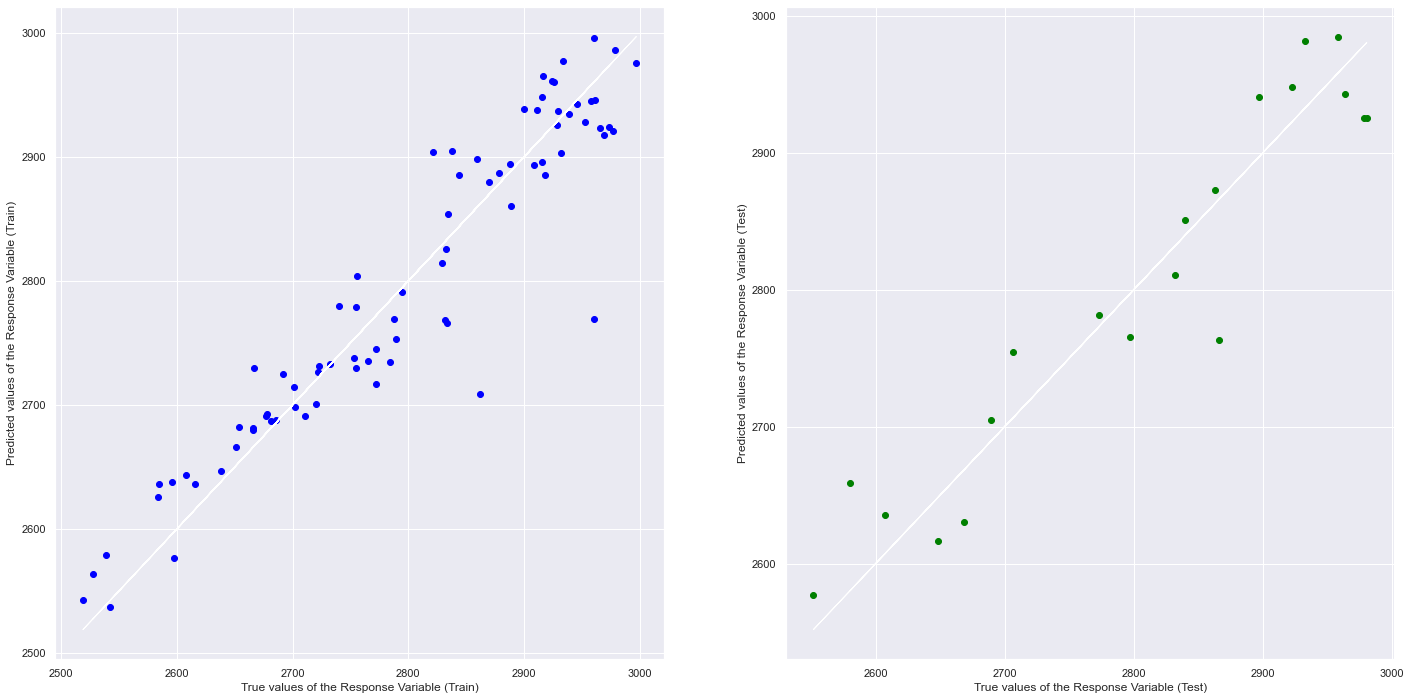

In [5]:
# Predict Response values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

#### Goodness of Fit of the Linear Regression model

In [6]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8953617684905412
Mean Squared Error (MSE) 	: 1798.9044718462096

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9027473040564077
Mean Squared Error (MSE) 	: 1840.122838095058



In [10]:
y_train_pred_df = pd.DataFrame(y_train_pred) #makes train prediction into dataframe
y_test_pred_df = pd.DataFrame(y_test_pred) #makes test prediction into dataframe

In [8]:
y_train_pred_df["index"] = y_train.index #copies the original index from the raw data
y_train_pred_df = y_train_pred_df.set_index("index") #sets index

y_test_pred_df["index"] = y_test.index #copies the original index from the raw data
y_test_pred_df = y_test_pred_df.set_index("index") #sets index

all_pred_df = pd.concat([y_test_pred_df, y_train_pred_df], axis=0)
all_pred_df = all_pred_df.sort_index()

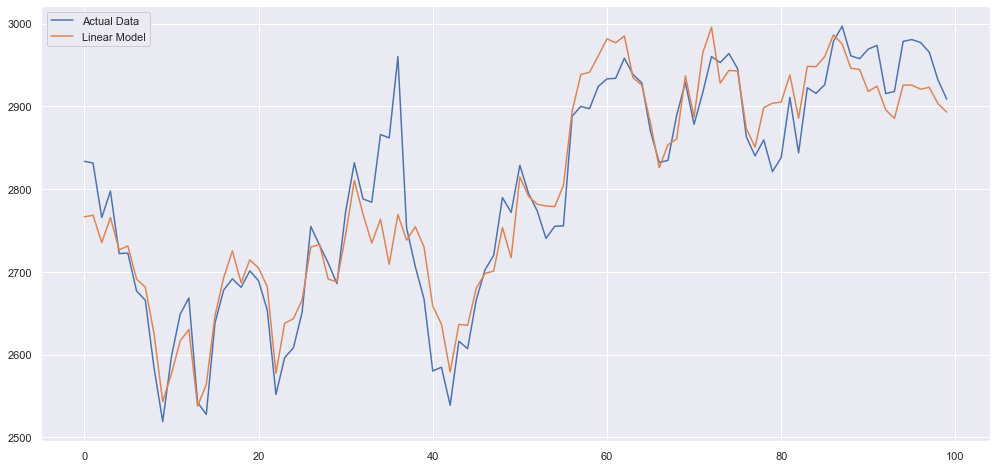

In [9]:
f, axes = plt.subplots(1,figsize=(17, 8))

plt.plot(y, label='Actual Data')
plt.plot(all_pred_df, label='Linear Model')

plt.legend(framealpha=1, frameon=True);

In [11]:
# Check the Goodness of Fit
print("Mean Squared Error (MSE) \t:", mean_squared_error(y, all_pred_df))

Mean Squared Error (MSE) 	: 1807.1481450959793
